The goal of this project is to predict the price of a diamond using a dataset of 5,0000 diamonnds. The dataset includes 10 attributes, counting the price.

### Index
* Data Loading
* Data Preprocessing
* Model selection
* Conclusion

### Data Loading
The dataset consists of 5000 diamonds with the following attributes:
* Carat: diamond’s physical weight
* Cut (Fair, Good, Very Good, Premium, Ideal): the more precise the diamond is cut, higher is the quality 
* Color (J, I,H,G,F,E,D): some color are rarest 
* Clarity (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
* Depth: vertical measurement of a diamond
* Table: flat, topmost facet of a diamond
* x: length of the diamond
* y: width of the diamond
* z: depth of the diamond



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

In [2]:
data=pd.read_csv(r'../datasets/diamonds/diamonds.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


In [3]:
data=pd.read_csv('/home/calcifer/Desktop//xtream-ai-assignment-engineer/datasets/diamonds/diamonds.csv')
num_data = data.shape[0]
print(num_data)

5000


### Data Preprocessing
##### Data Cleaning 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


Some diamonds have a price value that is negative and some diamonds have min value for the three dimensions x,y,z that is equal to zero, that means that the diamonid is 0D,1D or 2D. We filter these points that are incorrect.

In [6]:
data[data["price"]<=0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [7]:
data = data.drop(data[data["price"]<0].index)
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(4989, 10)

After the data cleaning we have 4989 data points.

##### Diamond Price Distribution 
We examine the distribution of price of diamonds 

count     4989.000000
mean      3930.581880
std       3970.923311
min        351.000000
25%        942.000000
50%       2398.000000
75%       5376.000000
max      18787.000000
Name: price, dtype: float64


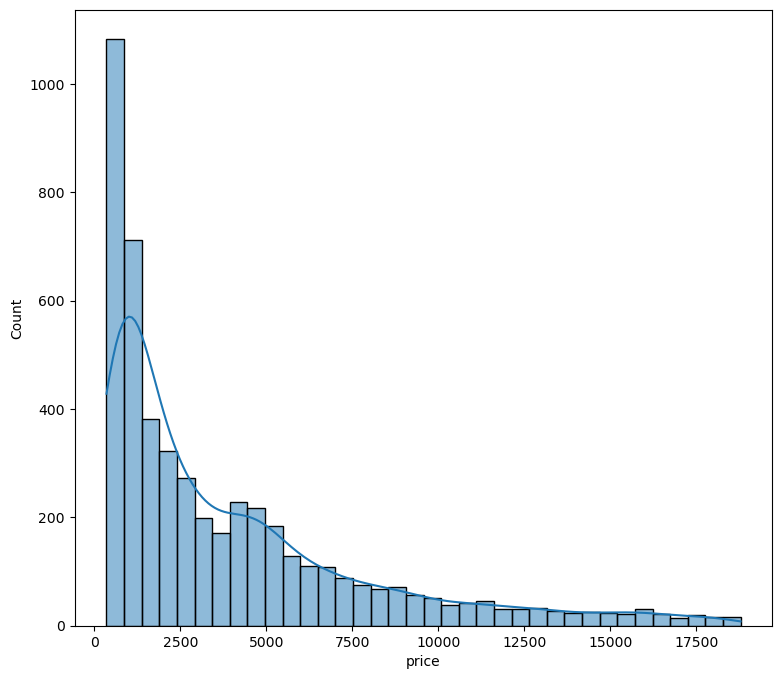

In [8]:
print(data['price'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(data['price'],kde=True);

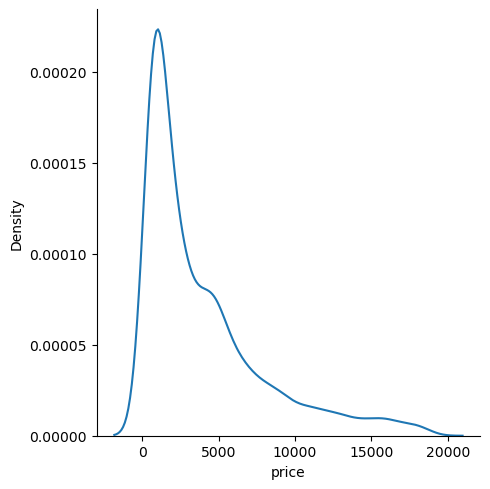

In [9]:
sns.displot(data["price"], kind="kde")

We can see that in the dataset are present more samples for the economic diamonds than for the more expensive.The model might have a better understanding of the characteristics and features associated with economic diamonds. This could potentially lead to more accurate predictions for economic diamonds compared to expensive ones.

##### Numerical Data Distribution 

We want to take a look at how the numerical features are distributed. We list all the types of data from our dataset and we select only the numerical ones.

In [10]:
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [11]:
df_numerical = data.select_dtypes(include = ['float64', 'int64'])
df_numerical.head()

,carat,depth,table,price,x,y,z
0,1.10,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,61.7,57.0,4493,6.17,6.21,3.82


In [12]:
df_numerical=df_numerical.drop(['price'],axis=1)

Then we plot the distribution of the numerical features.

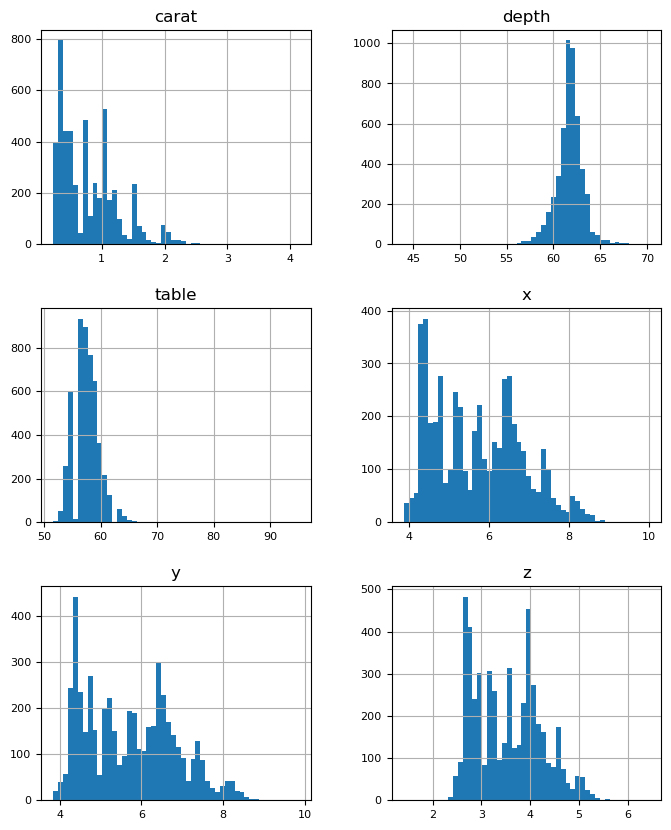

In [13]:
df_numerical.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8);

We study the relationship between numerical features and the average price of diamonds. This analysis can help us understand how each feature influences the price.

In [14]:
import plotly.express as px

feat = ['depth', 'carat', 'table', 'x', 'y', 'z']

for x_var in feat:
    df_temp = data.groupby([x_var])['price'].mean().reset_index()

    fig = px.scatter(df_temp, x=x_var, y="price", 
                     title=f"Average prices depending on {x_var}",
                     labels={x_var: x_var, "price": "Price"})
    fig.update_layout(width=600, height=400)  # Set width and height of the graph
    fig.show()

We observe that as any of the three dimensions (x, y, z) increases, the average price tends to rise. This suggests that these dimensions play a significant role in predicting the price of diamonds. The same applies to carat. While the average price doesn't vary too much when table and depth increase, this suggests that these features might not have a strong influence on determining the price of diamonds.

We now visulize the correlation between pairs of variables. This helps us understand if it present a linear, a non linear relationship or non relationship at all between variables. This plot helps us also to visualize outliers.

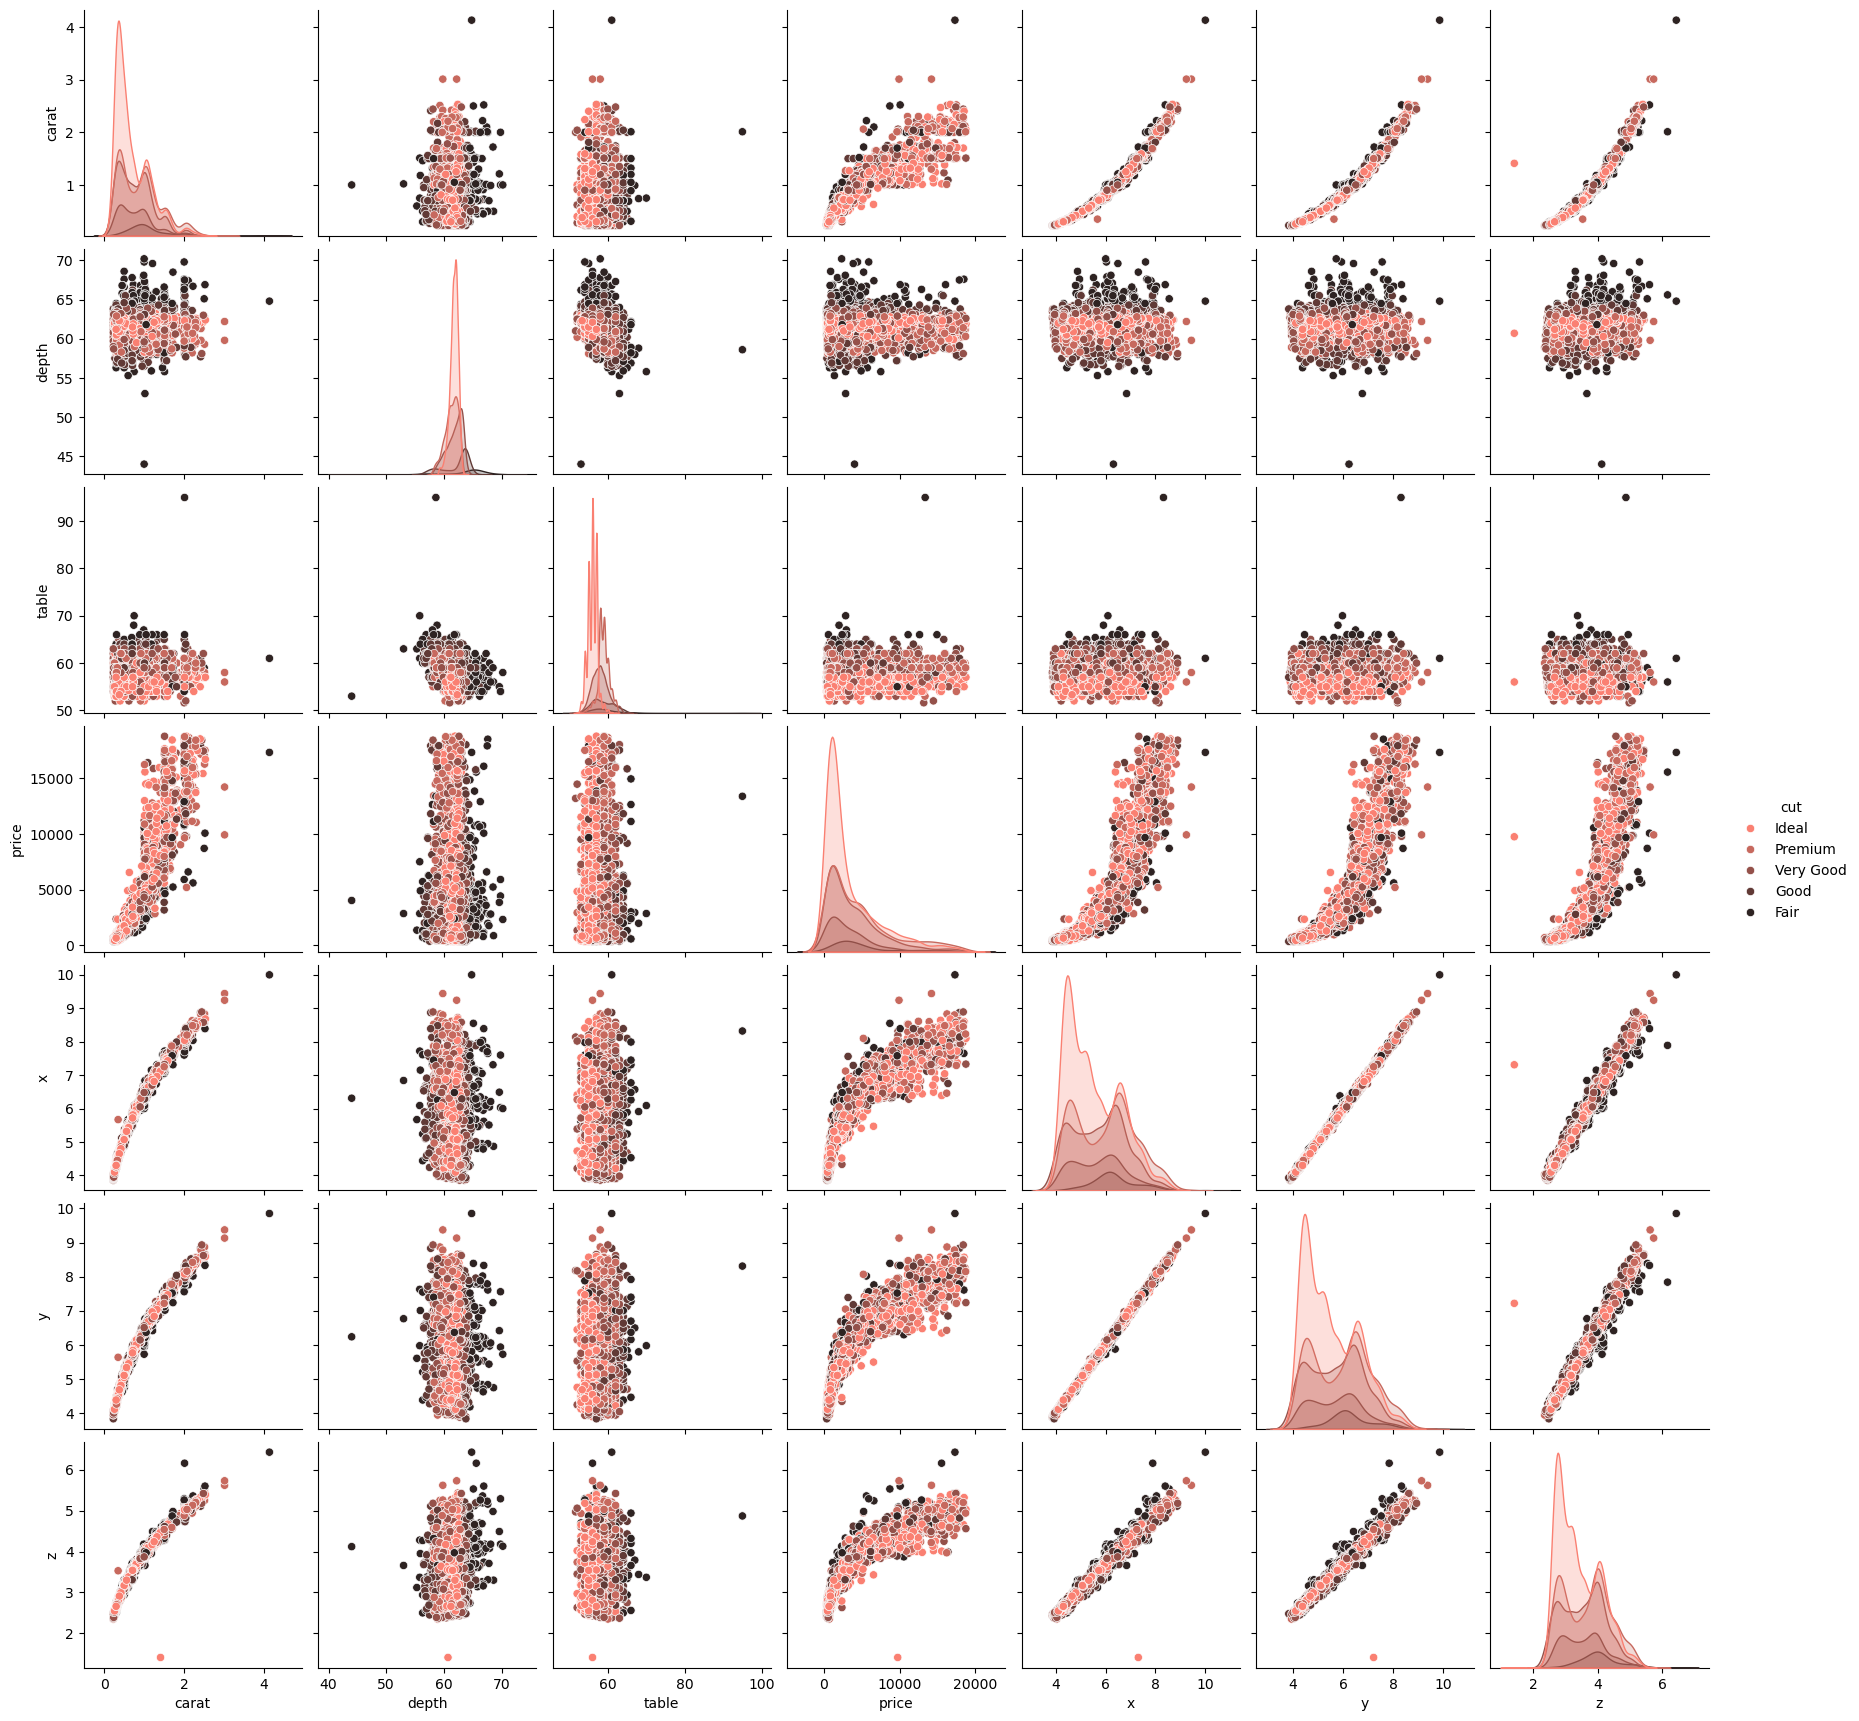

In [15]:
sns.pairplot(data,hue='cut', palette="dark:salmon_r")

In [16]:
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix


,carat,depth,table,price,x,y,z
carat,1.000000,0.005230,0.194213,0.920831,0.978600,0.977666,0.975706
depth,0.005230,1.000000,-0.323668,-0.025135,-0.049904,-0.052577,0.072393
table,0.194213,-0.323668,1.000000,0.140989,0.208683,0.202618,0.163957
price,0.920831,-0.025135,0.140989,1.000000,0.887051,0.887911,0.880601
x,0.978600,-0.049904,0.208683,0.887051,1.000000,0.998946,0.989459
y,0.977666,-0.052577,0.202618,0.887911,0.998946,1.000000,0.989143
z,0.975706,0.072393,0.163957,0.880601,0.989459,0.989143,1.000000


We can see that between the three dimensions of the diamond and the carat is present a positive correlation. Instead table and depth don't show any specific correlation with the other attributes.

##### Identifying and removing outliers


 We use the interquartile Range (IQR) to identify and remove outliers for each of the numerical features.

In [17]:
def remove_outliers_numeric(df,feature,delta=1.5):
    '''This function takes as input DataFrame and the feature name to consider and remove outliers 
    based on IQR and a delta (by default delta = 1.5)'''
    Q1_value = df[feature].quantile(0.25)
    Q3_value = df[feature].quantile(0.75)
    IQR_value = Q3_value - Q1_value    #IQR is interquartile range.
    lower_bound=Q1_value - delta * IQR_value
    upper_bound= Q3_value + delta *IQR_value
    print("lower bound for ", feature, "is {}".format(lower_bound))
    print("upper bound for ", feature, "is {}".format(upper_bound))
    filter_value = (df[feature] >= lower_bound) & (df[feature] <= upper_bound)
    df = df.loc[filter_value,:]
    return df

In [18]:
data=remove_outliers_numeric(data,'depth',delta=1.5)
data=remove_outliers_numeric(data,'table',delta=1.5)
data=remove_outliers_numeric(data,'x',delta=1.5)
data=remove_outliers_numeric(data,'y',delta=1.5)
data=remove_outliers_numeric(data,'z',delta=1.5)
data=remove_outliers_numeric(data,'carat',delta=1.5)

lower bound for  depth is 58.75
upper bound for  depth is 64.75
lower bound for  table is 51.5
upper bound for  table is 63.5
lower bound for  x is 1.92
upper bound for  x is 9.28
lower bound for  y is 1.9450000000000016
upper bound for  y is 9.264999999999999
lower bound for  z is 1.1700000000000004
upper bound for  z is 5.729999999999999
lower bound for  carat is -0.5850000000000001
upper bound for  carat is 2.015


In [19]:
data.shape

(4612, 10)

After that we remove the outliers we have 4612 data points.

#### Categorical Features 

Regarding categorical features, such as cut, color and clarity, one can make boxplots to see the distribution of prices and based on that recognize the presence of a trend.

/tmp/ipykernel_13912/1041022894.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_13912/1041022894.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_13912/1041022894.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Diamond prices based on the clarity')

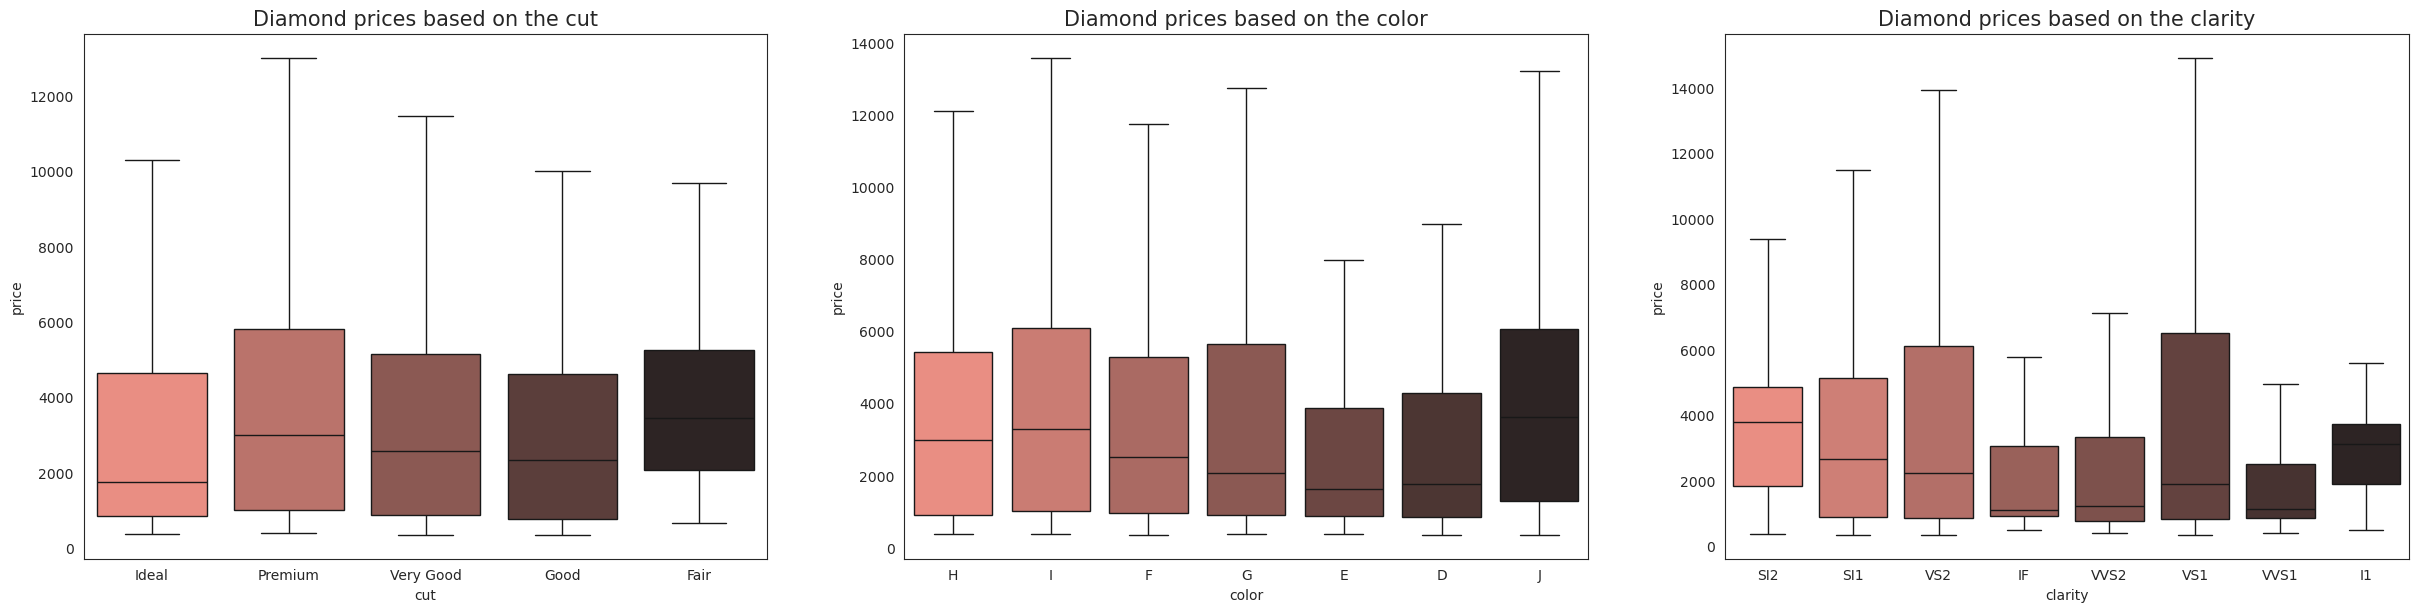

In [20]:
plt.figure(figsize=(30,15))

sns.set_style("white")
plt.subplot(2,3,1)
sns.boxplot(data=data, y=data['price'], x=data['cut'],showfliers=False, palette="dark:salmon_r").set_title("Diamond prices based on the cut",fontsize=15)

sns.set_style("white")
plt.subplot(2,3,2)
sns.boxplot(data=data, y=data['price'], x=data['color'],showfliers=False,palette="dark:salmon_r").set_title("Diamond prices based on the color",fontsize=15)

sns.set_style("white")
plt.subplot(2,3,3)
sns.boxplot(data=data, y=data['price'], x=data['clarity'],showfliers=False, palette="dark:salmon_r").set_title("Diamond prices based on the clarity",fontsize=15)

The price exhibits relatively minor variations across the categorical features.

##### Encoding categorical variables
We need to convert our categorical features into numerical representations that can be understood by machine learning models. To do this we use Label Encoding, because our categorical variables have an inherent ordinal relationship. 

In [21]:
# We get a list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
object_cols

['cut', 'color', 'clarity']

In [22]:
# We list the values for each categorical feature
for col in object_cols:
    print(data[col].unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['H' 'I' 'F' 'G' 'E' 'D' 'J']
['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'VVS1' 'I1']


In [23]:
# Define the order for each categorical variable (cut, color, clarity) from worst to best
cut_order= {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_order={'I1':0,'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
color_order={'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5,'D':6}
# Label encoding
data['encoded_cut'] = data['cut'].map(cut_order)
data['encoded_clarity'] = data['clarity'].map(clarity_order)
data['encoded_color'] = data['color'].map(color_order)
#We drop the columns cut, clarity and color
data=data.drop(['cut'],axis=1)
data=data.drop(['clarity'],axis=1)
data=data.drop(['color'],axis=1)
display(data)

,carat,depth,table,price,x,y,z,encoded_cut,encoded_clarity,encoded_color
0,1.10,62.0,55.0,4733,6.61,6.65,4.11,4,1,2
1,1.29,62.6,56.0,6424,6.96,6.93,4.35,4,2,2
2,1.20,61.1,58.0,5510,6.88,6.80,4.18,3,2,1
3,1.50,60.9,56.0,8770,7.43,7.36,4.50,4,2,4
4,0.90,61.7,57.0,4493,6.17,6.21,3.82,2,3,4
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,62.3,53.3,832,4.65,4.69,2.91,4,5,2
4996,0.33,61.3,59.0,927,4.45,4.42,2.72,3,5,3
4997,1.25,62.1,56.0,5980,6.81,6.84,4.24,4,5,0
4998,0.31,62.9,58.0,802,4.31,4.27,2.70,3,3,4


### ML model selection

We dividde our dataset in training and test and we standardize our features with StandardScaler.

In [24]:
scaler = StandardScaler()
data_X=data[["carat","depth", "table", "x", "y", "z","encoded_cut", "encoded_clarity",	"encoded_color"]]
data_y=data[["price"]]

##### Linear Regression
As first model we use Linear regression. We use a k-fold cross validation (k=5) to evaluate the machine learning model and test its performance.

In [25]:
lr = LinearRegression()

In [26]:
kf = KFold(n_splits=5)
r2_linear=[]
mae_linear=[]
X=data_X
y=data_y

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2=r2_score(y_test, y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2_linear.append(r2)
    mae_linear.append(mae)

In [27]:
print("r2 score:", r2_linear)
print("mae score:", mae_linear)
print("R² Score: {:.2f}".format(np.mean(r2_linear)))
print("MAE Score: {:.2f}".format(np.mean(mae_linear)))

r2 score: [0.9062487777624924, 0.8319275483786842, 0.916363557086265, 0.9088497534223643, 0.9187786448111833]
mae score: [721.5775047754646, 734.3736475815737, 759.2207466592147, 734.7514261043756, 736.7107117958589]
R² Score: 0.90
MAE Score: 737.33


##### Linear Tree Regressor
We try  a different model, Linear Tree Regressor, to see if this improves the prediction. We still use k-fold cross validation for evaluating the model.

In [28]:
regr = LinearTreeRegressor(base_estimator=LinearRegression())
r2_regr=[]
mae_regr=[]

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.transform(X_test)
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    r2=r2_score(y_test, y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2_regr.append(r2)
    mae_regr.append(mae)

In [29]:
print(r2_regr)
print(mae_regr)
print("R² Score: {:.2f}".format(np.mean(r2_regr)))
print("MAE Score: {:.2f}".format(np.mean(mae_regr)))

[0.9693326820237409, 0.9700482754830484, 0.9709942322324014, 0.9677296542119005, 0.9748064815693389]
[323.42851182931423, 333.31383668975997, 355.8092162159156, 345.8782422113315, 315.4892177623161]
R² Score: 0.97
MAE Score: 334.78


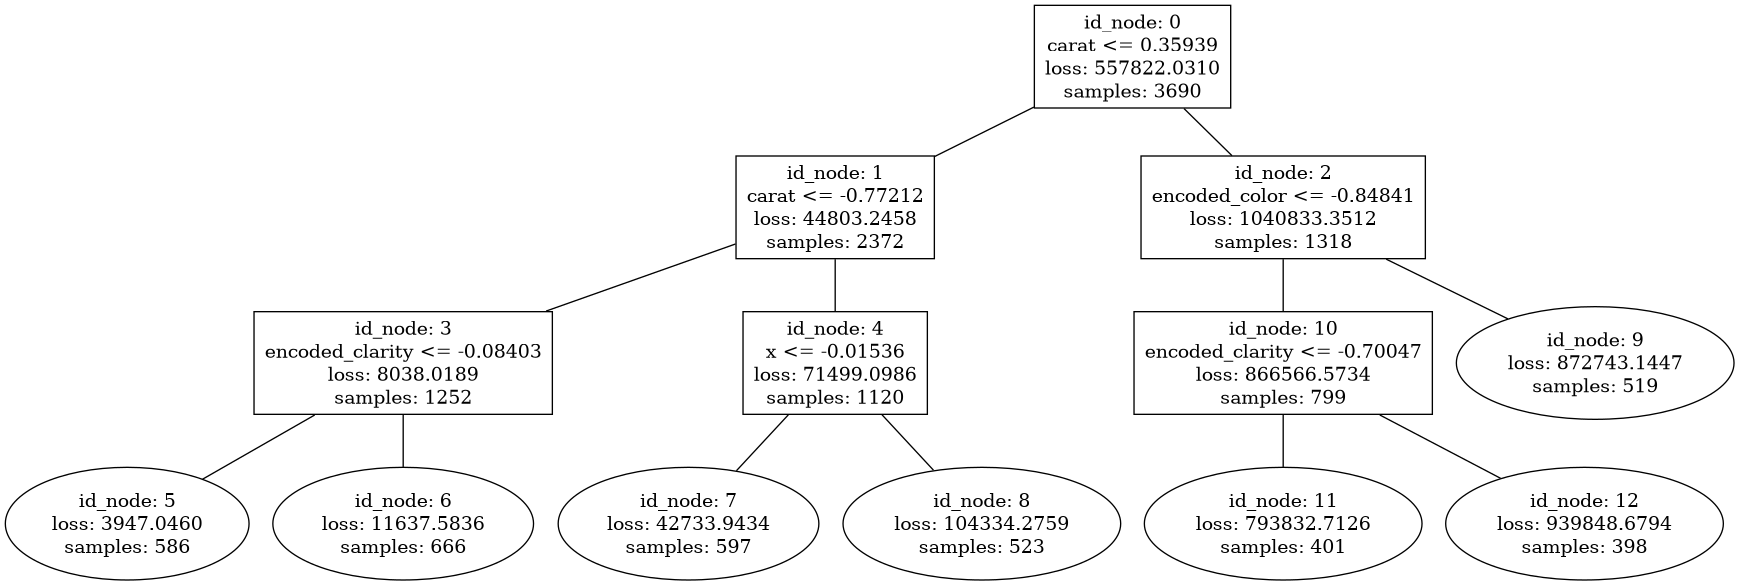

In [30]:
regr.plot_model(feature_names=X.columns)


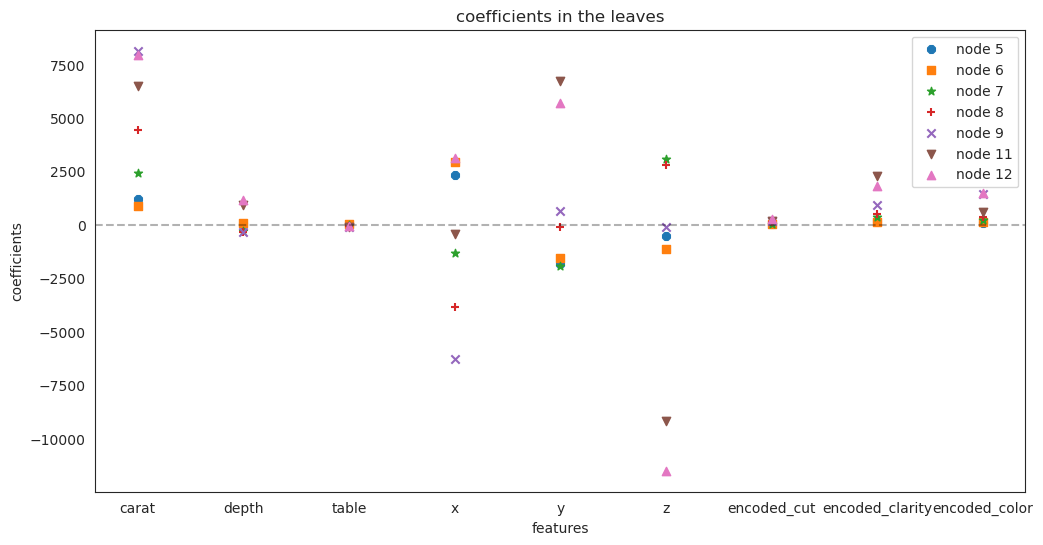

In [31]:
## Extract coefficients at the leaves

leaves = regr.summary(only_leaves=True)
markers = '8s*+xv^.'

plt.figure(figsize=(12,6))
for m,(i,l) in enumerate(leaves.items()):
    plt.scatter(range(X.shape[1]), l['models'].coef_, 
                marker=markers[m], label="node {}".format(i))

plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.title('coefficients in the leaves')
plt.xticks(range(X.shape[1]), X.columns)
plt.ylabel('coefficients'); plt.xlabel('features')
plt.legend()


In [33]:
leaves = regr.summary(only_leaves=True)

for m, (i, l) in enumerate(leaves.items()):
    coefficients = np.abs(l['models'].coef_)  # Absolute values of coefficients
    features = X.columns.tolist()
    
    print("Node {}: ".format(i))
    for feature, coefficient in zip(features, coefficients):
        if coefficient > 5000:
            print("Feature: {}, Absolute Coefficient: {}".format(feature, coefficient))
    print()

Node 5: 

Node 6: 

Node 7: 

Node 8: 

Node 9: 
Feature: carat, Absolute Coefficient: 8141.59716796875
Feature: x, Absolute Coefficient: 6273.0947265625

Node 11: 
Feature: carat, Absolute Coefficient: 6462.9794921875
Feature: y, Absolute Coefficient: 6702.03857421875
Feature: z, Absolute Coefficient: 9176.806640625

Node 12: 
Feature: carat, Absolute Coefficient: 7941.96533203125
Feature: y, Absolute Coefficient: 5711.48681640625
Feature: z, Absolute Coefficient: 11511.3701171875



##### Conclusion 

We achieved our best result with a Mean Absolute Error (MAE) of $334.78, utilizing Linear Tree Regression as our model. In diamond prediction, examining the absolute values of the coefficients within the linear models offers insight into the relative importance of features. Notably, dimensions such as x, y, z, and carat exhibit significant impact on the final prediction, surpassing the influence of cut, color, and clarity. Additionally, it appears that depth and table may not contribute significantly to the prediction."